In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats, integrate
import os

# Global parameters

In [2]:
data_file = 0

signal_1pe = 60e-3 # [V]
signal_2pe = 120e-3 # [V]
signal_3pe = 600e-3 # [V]


# Data

In [3]:
filename = []

path = '/home/investigator/mariandbt/python/data/'
path = path + '20230327/'

filename.append(os.path.join(path, 'C1--Time-resolution--COMBINED.txt')) 

In [4]:
filename[data_file]

'/home/investigator/mariandbt/python/data/20230327/C1--Time-resolution--COMBINED.txt'

In [5]:
data = []
with open(filename[data_file],'r', encoding='ascii') as fp:
    for i, line in enumerate(fp):
        if any(c.isalpha() for c in line[:7]) == False:
            data.append(np.asarray(line[:-1].split(','), dtype=float))
fp.close()

In [6]:
waveform = np.array(data)

n_points = int(np.where(waveform[:, 0] == waveform[:, 0].max())[0][0] + 1)
n_frames = int(len(waveform)/n_points) 
waveform_saturation = waveform[:, 1].max()

print('n_points = ', n_points)
print('n_frames = ', n_frames)

n_points =  2227
n_frames =  693


# Functions

In [7]:
# Fitting distributions to define

# note: pdf are normilized to 1 so we have yo add an amplitude param
def gauss(x, a,  mu, sigma):
    return a*stats.norm.pdf(x, mu, sigma) 

# Analysis

### Waveform

In [8]:
frame = int(n_frames/2)
frame = 1
frame = 100
frame = int(n_frames) - 1
frame = 500

frame =  500
t_half_peak =  7.44794e-07


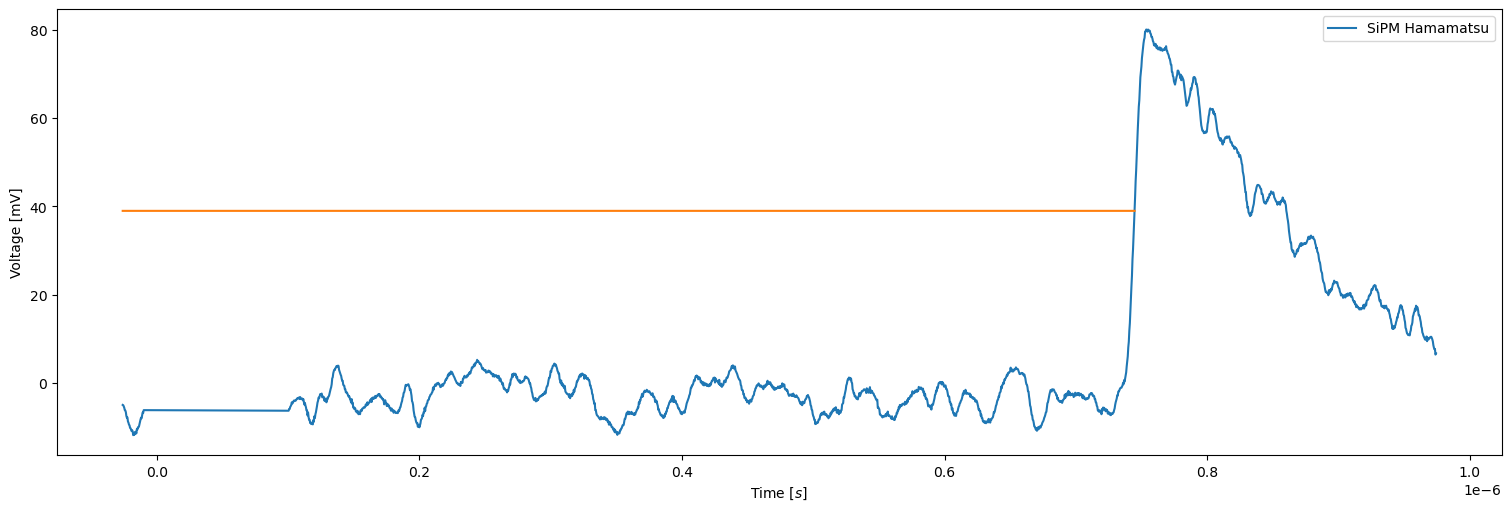

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

print('frame = ', frame)

wave = waveform[frame*n_points: (frame + 1)*n_points].copy()

signal = wave[:, 1]*1e3
t = wave[:, 0]
dt = t[1] - t[0]

mask = np.fabs(signal - signal.max()/2.) < 1.55

t_half_peak = t[mask][0]
s_half_peak = signal[mask][0]
print('t_half_peak = ', t_half_peak)

ax.plot(t, signal, label = 'SiPM Hamamatsu')
ax.plot(np.linspace(t.min(), t_half_peak, len(t)), s_half_peak*np.ones(len(t)))

ax.set_ylabel('Voltage [mV]');
ax.set_xlabel('Time [$s$]');
ax.legend(loc = 'best')

(0.85644802, 150.0)

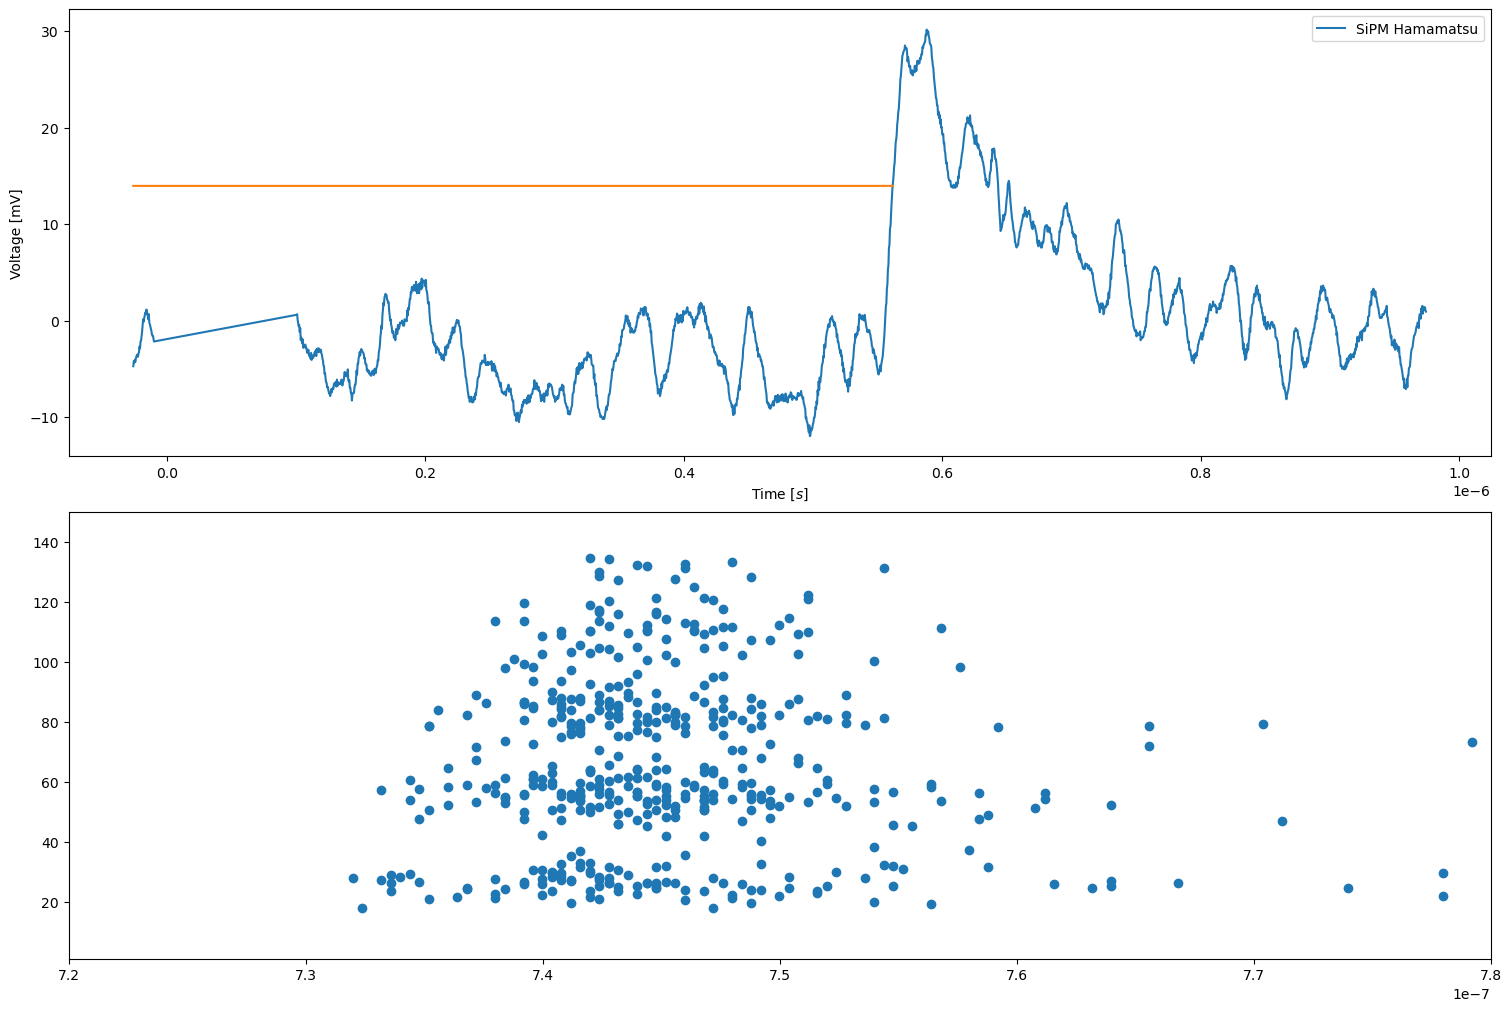

In [14]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10), constrained_layout=True)

t_half_peak = []
s_half_peak = []
s_peak = []

for frame in range(n_frames):
    wave = waveform[frame*n_points: (frame + 1)*n_points].copy()

    if wave[:, 1].max() == waveform_saturation: 
        continue
    
    signal = wave[:, 1]*1e3
    t = wave[:, 0]
    dt = t[1] - t[0]

    mask = np.fabs(signal - signal.max()/2.) < 1.55

    t_half_peak.append(t[mask][0])
    s_half_peak.append(signal[mask][0])

    s_peak.append(signal.max())
    
t_half_peak = np.array(t_half_peak)
s_half_peak = np.array(s_half_peak)
s_peak = np.array(s_peak)
    
#______________________plot settings________________________________________________________

ax[0].plot(t, signal, label = 'SiPM Hamamatsu')
ax[0].plot(np.linspace(t.min(), t_half_peak[-1], len(t)), s_half_peak[-1]*np.ones(len(t)))

ax[0].set_ylabel('Voltage [mV]');
ax[0].set_xlabel('Time [$s$]');
ax[0].legend(loc = 'best')

ax[1].plot(t_half_peak, s_peak, 'o')
ax[1].set_xlim([7.2e-7, 7.8e-7])
ax[1].set_ylim([s_peak.min(), 150])


In [11]:
waveform.max()
# waveform[:, 1].max()
# np.where(waveform[:, 1] == waveform.max())

0.13485762

### Time resolution calculation

We need to separate the time information for different peaks 